Importing the Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
twitter_data=pd.read_csv('Twitter_Data.csv')
reddit_data=pd.read_csv('Reddit_Data.csv')

In [5]:
twitter_data.head(), reddit_data.head()

(                                          clean_text  category
 0  when modi promised “minimum government maximum...      -1.0
 1  talk all the nonsense and continue all the dra...       0.0
 2  what did just say vote for modi  welcome bjp t...       1.0
 3  asking his supporters prefix chowkidar their n...       1.0
 4  answer who among these the most powerful world...       1.0,
                                        clean_comment  category
 0   family mormon have never tried explain them t...         1
 1  buddhism has very much lot compatible with chr...         1
 2  seriously don say thing first all they won get...        -1
 3  what you have learned yours and only yours wha...         0
 4  for your own benefit you may want read living ...         1)

In [6]:
twitter_data.rename(columns = {'clean_text': 'text'}, inplace = True)
reddit_data.rename(columns = {'clean_comment': 'text'}, inplace = True)

In [7]:
df=pd.concat([reddit_data, twitter_data], ignore_index = True)

In [8]:
df

,text,category
0,family mormon have never tried explain them t...,1.0
1,buddhism has very much lot compatible with chr...,1.0
2,seriously don say thing first all they won get...,-1.0
3,what you have learned yours and only yours wha...,0.0
4,for your own benefit you may want read living ...,1.0
...,...,...
200224,why these 456 crores paid neerav modi not reco...,-1.0
200225,dear rss terrorist payal gawar what about modi...,-1.0
200226,did you cover her interaction forum where she ...,0.0
200227,there big project came into india modi dream p...,0.0


Data Exploration

In [9]:
df.shape

(200229, 2)

In [10]:
df.head()

,text,category
0,family mormon have never tried explain them t...,1.0
1,buddhism has very much lot compatible with chr...,1.0
2,seriously don say thing first all they won get...,-1.0
3,what you have learned yours and only yours wha...,0.0
4,for your own benefit you may want read living ...,1.0


In [11]:
df['category'].value_counts()

category
 1.0    88080
 0.0    68355
-1.0    43787
Name: count, dtype: int64

In [12]:
df['category']=df['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})

In [13]:
df

,text,category
0,family mormon have never tried explain them t...,Positive
1,buddhism has very much lot compatible with chr...,Positive
2,seriously don say thing first all they won get...,Negative
3,what you have learned yours and only yours wha...,Neutral
4,for your own benefit you may want read living ...,Positive
...,...,...
200224,why these 456 crores paid neerav modi not reco...,Negative
200225,dear rss terrorist payal gawar what about modi...,Negative
200226,did you cover her interaction forum where she ...,Neutral
200227,there big project came into india modi dream p...,Neutral


Data Preprocessing

In [14]:
#Checking for null values
df.isnull().sum()

text        104
category      7
dtype: int64

In [15]:
#removing the rows which contain null values
df1= df.dropna()

In [16]:
df1.isnull().sum()

text        0
category    0
dtype: int64

In [17]:
#Changing to lowercase
df1.loc[:,'text']=df1['text'].str.lower()

In [18]:
import re

In [19]:
def remove_except_alphanumeric(text):
    return re.sub(r"[^A-Za-z0-9]",' ', text)

In [20]:
df1.loc[:,'text']=df1['text'].apply(remove_except_alphanumeric)

In [21]:
df1

,text,category
0,family mormon have never tried explain them t...,Positive
1,buddhism has very much lot compatible with chr...,Positive
2,seriously don say thing first all they won get...,Negative
3,what you have learned yours and only yours wha...,Neutral
4,for your own benefit you may want read living ...,Positive
...,...,...
200224,why these 456 crores paid neerav modi not reco...,Negative
200225,dear rss terrorist payal gawar what about modi...,Negative
200226,did you cover her interaction forum where she ...,Neutral
200227,there big project came into india modi dream p...,Neutral


In [22]:
from nltk.tokenize import sent_tokenize, word_tokenize
df1.loc[:,'text']=df1['text'].apply(word_tokenize)
df1

,text,category
0,"[family, mormon, have, never, tried, explain, ...",Positive
1,"[buddhism, has, very, much, lot, compatible, w...",Positive
2,"[seriously, don, say, thing, first, all, they,...",Negative
3,"[what, you, have, learned, yours, and, only, y...",Neutral
4,"[for, your, own, benefit, you, may, want, read...",Positive
...,...,...
200224,"[why, these, 456, crores, paid, neerav, modi, ...",Negative
200225,"[dear, rss, terrorist, payal, gawar, what, abo...",Negative
200226,"[did, you, cover, her, interaction, forum, whe...",Neutral
200227,"[there, big, project, came, into, india, modi,...",Neutral


In [23]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [24]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [25]:
def stemming(text):
    stemmed_text = [stemmer.stem(token) for token in text if token.lower() not in stop_words]
    return ' '.join(stemmed_text)

In [26]:
df1.loc[:,'text'] = df1['text'].apply(stemming)

In [27]:
df1

,text,category
0,famili mormon never tri explain still stare pu...,Positive
1,buddhism much lot compat christian especi cons...,Positive
2,serious say thing first get complex explain no...,Negative
3,learn want teach differ focu goal wrap paper b...,Neutral
4,benefit may want read live buddha live christ ...,Positive
...,...,...
200224,456 crore paid neerav modi recov congress lead...,Negative
200225,dear rss terrorist payal gawar modi kill 1000 ...,Negative
200226,cover interact forum left,Neutral
200227,big project came india modi dream project happ...,Neutral


In [28]:
df1.head()

,text,category
0,famili mormon never tri explain still stare pu...,Positive
1,buddhism much lot compat christian especi cons...,Positive
2,serious say thing first get complex explain no...,Negative
3,learn want teach differ focu goal wrap paper b...,Neutral
4,benefit may want read live buddha live christ ...,Positive


In [29]:
df1['text'][4]

'benefit may want read live buddha live christ thich nhat hanh might find subsequ discuss love one easier abl articul parallel exist buddhism christian surpris react neg lost treat compass deserv understand although may inde display sign hurt new path properli share way may allevi fear someth may perceiv wrong least alien belief may help allow long run accept although necessarili agre decis regardless end make way'

Data Visualization

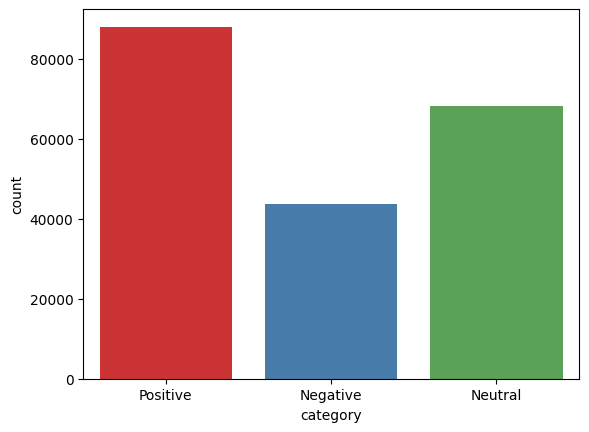

In [30]:
ax= sns.countplot(x='category',data=df1,palette="Set1",hue="category",legend=False)

In [31]:
#let introduce a column which has number of words in a tweet
def find_len(text):
    return len(text.split())

In [32]:
df1.loc[:,"words_in_text"] = df1['text'].apply(find_len)

/tmp/ipykernel_12845/1705434168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:,"words_in_text"] = df1['text'].apply(find_len)


In [33]:
df1.head()

,text,category,words_in_text
0,famili mormon never tri explain still stare pu...,Positive,26
1,buddhism much lot compat christian especi cons...,Positive,137
2,serious say thing first get complex explain no...,Negative,46
3,learn want teach differ focu goal wrap paper b...,Neutral,14
4,benefit may want read live buddha live christ ...,Positive,67


In [34]:
df1.groupby('category').count()

,text,words_in_text
category,,
Negative,43786,43786
Neutral,68253,68253
Positive,88079,88079


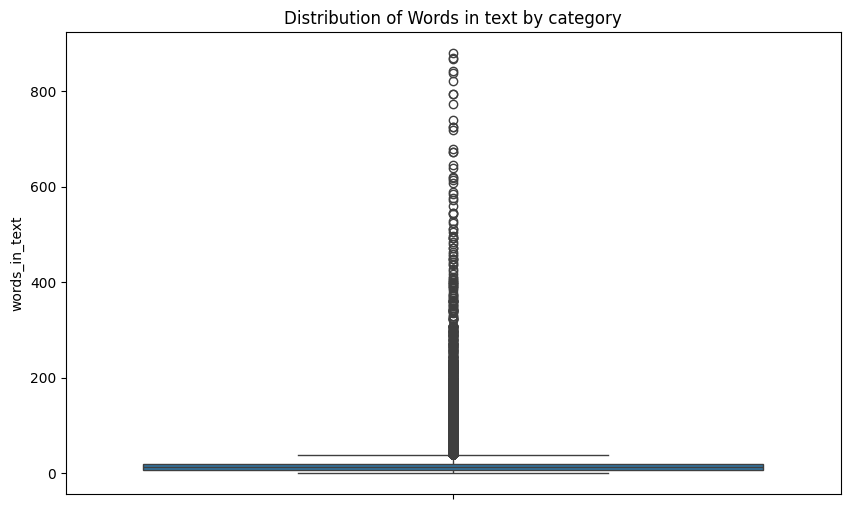

In [35]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(y="words_in_text",data=df1)
plt.title("Distribution of Words in text by category")
plt.show()

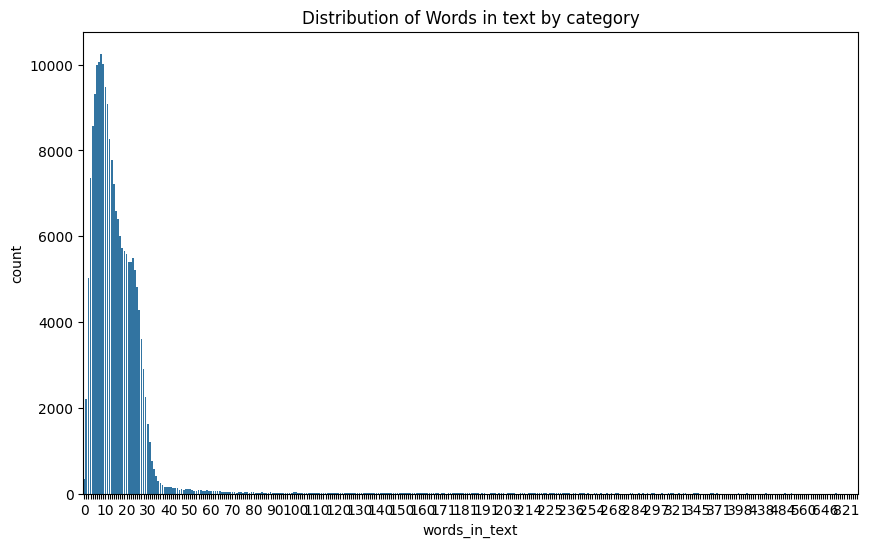

In [36]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x="words_in_text",data=df1)

n = 10
for i, label in enumerate(ax.get_xticklabels()):
    if i % n != 0:
        label.set_visible(False)
        
plt.title("Distribution of Words in text by category")
plt.show()

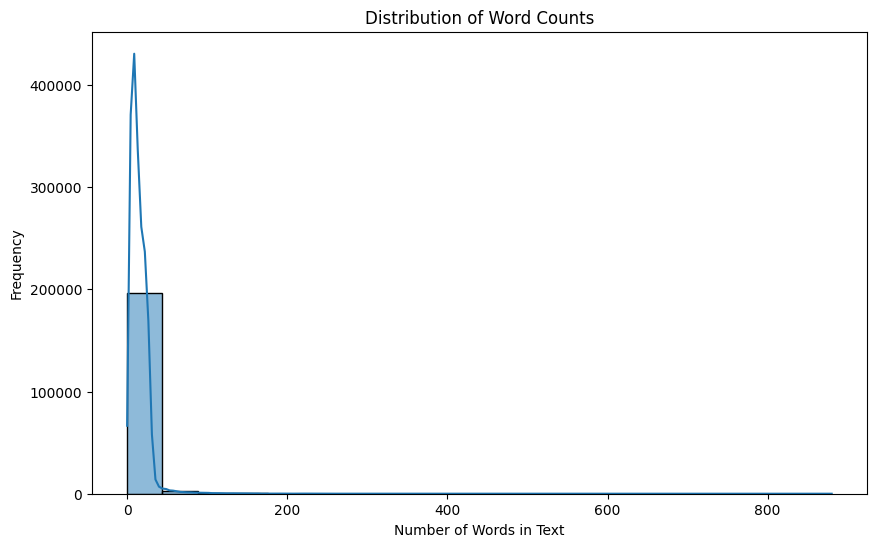

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x="words_in_text", bins=20, kde=True)
plt.title("Distribution of Word Counts")
plt.xlabel("Number of Words in Text")
plt.ylabel("Frequency")
plt.show()

In [38]:
#we can conclude that most of the tweets have length between 0 to 15 words

In [39]:
df1[df1['words_in_text']>20].count()

text             49158
category         49158
words_in_text    49158
dtype: int64

In [40]:
#There are only 227 Tweets of length more than 20 words.

In [41]:
majority_tweets= df1[df1['words_in_text']<10]

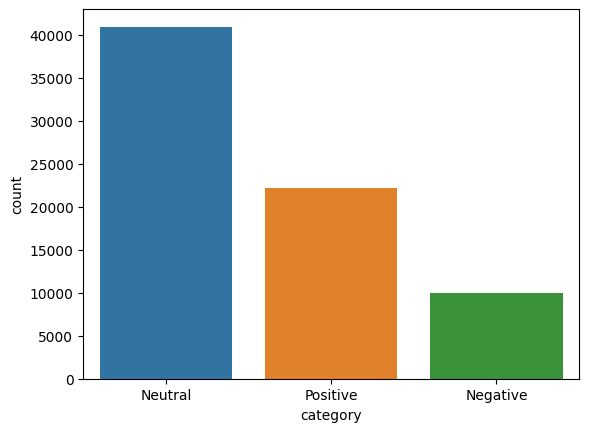

In [42]:
ax = sns.countplot(x = 'category', data = majority_tweets, hue='category')

In [43]:
#we can observe that majority of the tweets are positive or neutral

In [44]:
## These are basically the tweets which were in other language and  does not had english char in original tweet, and got cleared up while pre-proscessing
zero_len_tweet = df1[df1['words_in_text']==0]

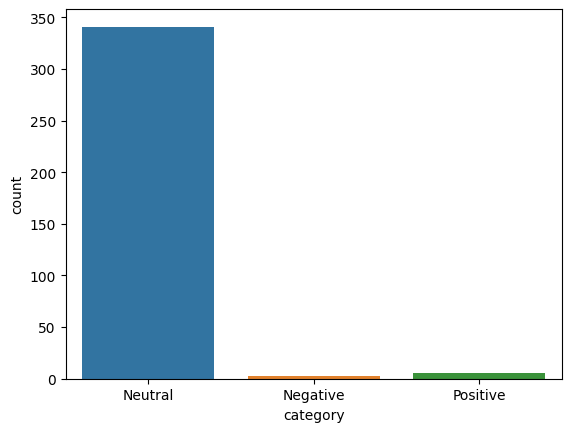

In [45]:
ax = sns.countplot(x='category', data = zero_len_tweet,hue='category')

Feature Extraction: Bag of words
 -  To train a machine learning model on text data, you need to convert the text into numerical features.

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
count_vectorizer = CountVectorizer(max_features=5000)
count_matrix = count_vectorizer.fit_transform(df1['text'])

In [60]:
import pickle
pickle.dump(count_vectorizer,open("count_vectorizer.pkl","wb"))

splitting the data : 75% for training and 25% for testing

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(count_matrix, df1['category'], test_size=0.2, random_state=42)

train the model using Multinomial Naive bayes

In [63]:
from sklearn.naive_bayes import MultinomialNB

In [64]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score, classification_report

In [66]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7282630421746952
              precision    recall  f1-score   support

    Negative       0.68      0.64      0.66      8860
     Neutral       0.75      0.71      0.73     13527
    Positive       0.73      0.79      0.76     17637

    accuracy                           0.73     40024
   macro avg       0.72      0.71      0.72     40024
weighted avg       0.73      0.73      0.73     40024



In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logistic_classifier = LogisticRegression(max_iter=1000)  
logistic_classifier.fit(X_train, y_train)
y_pred = logistic_classifier.predict(X_test)
pickle.dump(logistic_classifier,open("logistic_classifier_for_count_vectorizer.pkl","wb"))

In [69]:
from sklearn.metrics import accuracy_score, classification_report

In [70]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8518388966620029
              precision    recall  f1-score   support

    Negative       0.81      0.75      0.78      8860
     Neutral       0.83      0.92      0.87     13527
    Positive       0.89      0.85      0.87     17637

    accuracy                           0.85     40024
   macro avg       0.84      0.84      0.84     40024
weighted avg       0.85      0.85      0.85     40024



In [73]:
vectorizer=pickle.load(open("count_vectorizer.pkl","rb"))
classifier=pickle.load(open("logistic_classifier_for_count_vectorizer.pkl","rb"))

In [81]:
for i in range(3):
    user_text=[input("Enter your text: ")]
    vectorized_text = vectorizer.transform(user_text)
    prediction = classifier.predict(vectorized_text)
    print('category:',prediction[0])

Enter your text:  what a nice compliment by the director


category: Positive


Enter your text:  it's a bad situation in the country right now


category: Negative


Enter your text:  lets go to the park


category: Neutral
